In [26]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import manifold
from mpl_toolkits.mplot3d import Axes3D

matplotlib.style.use('ggplot')

In [27]:
df = pd.read_excel('BreastCancer.xlsx', index=['ID','Outcome','Time','radius','texture','perimeter','area','smoothness','compactness','concavity','concave_points','symmetry','fractal_dimension','Radius_SE','Perimeter_SE', 'Area_SE', 'Texture_SE', 'Compactness_SE', 'Smoothness_SE', 'Concavity_SE', 'Concave_Points_SE', 'Fractal Dimension_SE', 'Symmetry_SE','Area_Worst','Perimeter_Worst','Compactness_Worst', 'Concavity_Worst', 'Fractal_Dimension_Worst', 'Symmetry_Worst','Concave Points_Worst','Texture_Worst','Tumor_Size','Lymph_Node'])

df = df.iloc[:,1:]
#df.iloc[:,12:32].head()
df1 = df.drop(df.iloc[:,12:32], axis=1)

#print('Number of NaN values:' +str(df.isnull().sum().sum()))
df.head()

,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [28]:
df = df.dropna()
df = df[df['Outcome'] != 'N']
df = df.drop('Outcome', 1)

In [29]:
df.head()

,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
4,27,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.19800,0.10430,0.1809,...,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
5,77,12.75,15.29,84.60,502.7,0.1189,0.1569,0.16640,0.07666,0.1995,...,107.3,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0
7,77,13.71,20.83,90.20,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,...,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,4.0,10
13,36,14.54,27.54,96.73,658.8,0.1139,0.1595,0.16390,0.07364,0.2303,...,124.1,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410,6.0,6
15,10,16.13,20.68,108.10,798.8,0.1170,0.2022,0.17220,0.10280,0.2164,...,136.8,1315.0,0.1789,0.4233,0.4784,0.2073,0.3706,0.11420,3.0,1


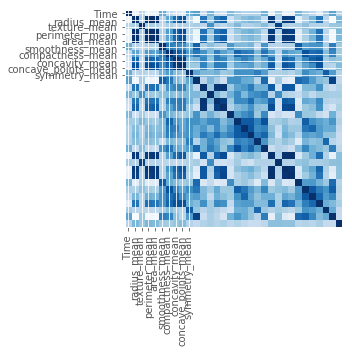

In [30]:
plt.imshow(df.corr(), cmap=plt.cm.Blues, interpolation='nearest')
tick_marks = [i for i in range(len(df1.iloc[1:11]))]
plt.xticks(tick_marks, df1.iloc[:,1:11], rotation='vertical')
plt.yticks(tick_marks, df1.iloc[:,1:11])

plt.show()

In [31]:
new_df = df[['Time','radius_mean','concave_points_mean','fractal_dimension_mean','Worst_radius','Worst_smoothness']]
y = new_df.iloc[:,0]
y.head()

4     27
5     77
7     77
13    36
15    10
Name: Time, dtype: int64

In [32]:
from sklearn_pandas import DataFrameMapper

labels = new_df.pop('Time')
mapper = DataFrameMapper([(new_df.columns, StandardScaler())])
scaled_features = mapper.fit_transform(new_df.copy(), 4)
scaled_features_df = pd.DataFrame(scaled_features, index=new_df.index, columns=new_df.columns)
scaled_features_df.head()

,radius_mean,concave_points_mean,fractal_dimension_mean,Worst_radius,Worst_smoothness
4,0.569751,0.304086,-0.391568,-0.053707,-0.418681
5,-1.699137,-0.506902,1.680062,-1.557559,1.311024
7,-1.410260,-1.000126,2.144197,-1.225984,1.040106
13,-1.160502,-0.595512,1.539365,-1.140417,1.165145
15,-0.682049,0.260075,1.990563,-0.391700,1.743450


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, y, test_size=0.2, random_state=200)

In [41]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)

C:\Users\shail\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
prediction = regressor.predict(X_test)

In [44]:
prediction = pd.DataFrame(prediction).to_csv('prediction.csv')